In [ ]:
#from numba import jit
#import h5py
from pylidar import lidarprocessor
from pylidar.toolbox import spatial
from pylidar.lidarformats import generic
from pylidar.lidarformats import pulsewaves

In [1]:
from matplotlib import pyplot as plt
import rtree
import scipy
import numpy as np
import pandas as pd
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.append(pypwaves)
pypwaves = os.path.join(os.getcwd(), 'RMBL', 'Projects', 'Watershed_Spatial_Dataset', 'Libraries', 'pypwaves', 'pypwaves')
import base as pw

NameError: name 'pypwaves' is not defined

In [ ]:
datadir = os.path.join('/Users', 'hmworsham', 'Desktop', 'RMBL', 'Projects', 'Watershed_Spatial_Dataset', 'Source', 'NEON_PulseWaves_2018')
pw_in = os.path.join(datadir, 'L072-5_2018_CRBU_1_V01_2018062514_P01_r_w_translate.plz')


In [ ]:
pw_in

pulsewave = pw.openPLS(pw_in)

In [ ]:
def findMinZs(data, outImage, xMin, yMax):
    for i in range(data.shape[0]):
        if data[i]['CLASSIFICATION'] == lidarprocessor.CLASSIFICATION_GROUND:
            row, col = spatial.xyToRowColNumba(data[i]['X'], data[i]['Y'],
                    xMin, yMax, BINSIZE)
            if outImage[row, col] != 0:
                if data[i]['Z'] < outImage[row, col]:
                    outImage[row, col] = data[i]['Z']
            else:
                outImage[row, col] = data[i]['Z']

def processChunk(data, otherArgs):
    lidar = data.input1.getPoints(colNames=['X', 'Y', 'Z', 'CLASSIFICATION'])
    findMinZs(lidar, otherArgs.outImage, otherArgs.xMin, otherArgs.yMax)

info = generic.getLidarFileInfo(inFile)
header = info.header

dataFiles = lidarprocessor.DataFiles()
dataFiles.input1 = lidarprocessor.LidarFile(inFile, lidarprocessor.READ)

xMin, yMax, ncols, nrows = spatial.getGridInfoFromHeader(header, BINSIZE)

outImage = numpy.zeros((nrows, ncols))

otherArgs = lidarprocessor.OtherArgs()
otherArgs.outImage = outImage
otherArgs.xMin = xMin
otherArgs.yMax = yMax

lidarprocessor.doProcessing(processChunk, dataFiles, otherArgs=otherArgs)

iw = spatial.ImageWriter(outFile, tlx=xMin, tly=yMax, binSize=BINSIZE)
iw.setLayer(outImage)
iw.close()

In [ ]:
def readFunc(data):
    # returns 2d masked structured array with info about waveforms
    # first axis is waveform number, second is pulse
    waveinfo = data.input1.getWaveformInfo()

    # returns masked 3d radiance array
    # first axis is waveform bin, second is waveform number, third is pulse
    recv = data.input1.getReceived()
    trans = data.input1.getTransmitted()

dataFiles = lidarprocessor.DataFiles()
dataFiles.input1 = lidarprocessor.LidarFile(infile, lidarprocessor.READ)
lidarprocessor.doProcessing(readFunc, dataFiles)

In [2]:
xx = pd.read_csv('/Users/hmworsham/Desktop/slope_unc_corr.csv')

(array([ 11.,  26.,  33.,  27.,  59., 118., 176., 206.,  69.,   2.]),
 array([ 54.6995  ,  72.163431,  89.627362, 107.091293, 124.555224,
        142.019155, 159.483086, 176.947017, 194.410948, 211.874879,
        229.33881 ]),
 <BarContainer object of 10 artists>)

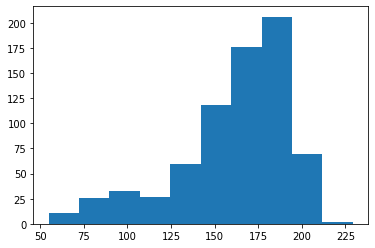

In [8]:
plt.hist(xx['OUTPUT'])

In [3]:
yy = pd.read_csv('/Users/hmworsham/Desktop/buffered.csv')

In [4]:
tog = xx.merge(yy, on = xx.index)

In [5]:
tog

,key_0,SlopeDeg_9,OUTPUT,id,_mean,_stdev,_range,_variety,_variance
0,0,14.34594,102.42208,0,3374.444546,165.163780,687.064209,0,27279.074288
1,1,12.98019,NaN,1,2813.418770,52.234030,234.010742,0,2728.393916
2,2,3.79767,141.44502,2,3181.937711,56.250771,526.301514,0,3164.149259
3,3,35.60099,NaN,3,3538.798032,124.093869,677.885986,0,15399.288296
4,4,36.17128,NaN,4,3785.583632,120.164230,547.985352,0,14439.442207
...,...,...,...,...,...,...,...,...,...
995,995,24.42748,141.40633,995,3205.443104,91.043917,417.223877,0,8288.994813
996,996,7.25083,194.69112,996,3009.716870,98.533378,529.392578,0,9708.826655
997,997,12.85177,106.50108,997,3253.190979,54.131831,260.513672,0,2930.255180
998,998,0.01554,176.71130,998,3532.005062,108.887806,484.349365,0,11856.554240


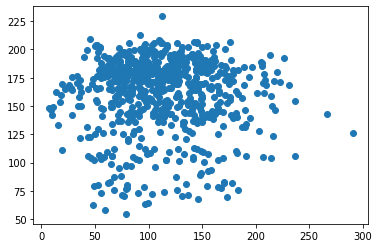

In [9]:
plt.scatter(tog._stdev, tog.OUTPUT)
